In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense, Flatten
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy
from keras.preprocessing.image import ImageDataGenerator
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [0]:
train_path = '/content/drive/My Drive/Colab Notebooks/Eklavya/Cars & Trucks/Train'
valid_path = '/content/drive/My Drive/Colab Notebooks/Eklavya/Cars & Trucks/Valid'
test_path = '/content/drive/My Drive/Colab Notebooks/Eklavya/Cars & Trucks/Test'

In [9]:
train_batches = ImageDataGenerator().flow_from_directory(directory=train_path, target_size=(224,224),
    classes=['Cars', 'Trucks'], batch_size=10)
valid_batches = ImageDataGenerator().flow_from_directory(directory=valid_path, target_size=(224,224),
    classes=['Cars', 'Trucks'], batch_size=10)
test_batches = ImageDataGenerator().flow_from_directory(directory=test_path, target_size=(224,224),
    classes=['Cars', 'Trucks'], batch_size=10)

Found 700 images belonging to 2 classes.
Found 80 images belonging to 2 classes.
Found 80 images belonging to 2 classes.


In [0]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [0]:
imgs, labels = next(train_batches)

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


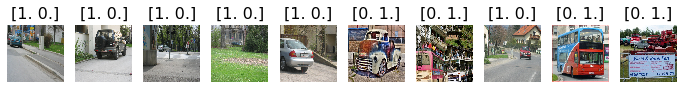

In [14]:
plots(imgs, titles=labels) # for car: [1,0] & for truck: [0,1]

# Build a CNN

In [0]:
model = Sequential([
    Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(224,224,3)),
    Flatten(),
    Dense(2, activation='softmax'),
    ])

In [16]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
flatten_1 (Flatten)          (None, 1577088)           0         
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 3154178   
Total params: 3,155,074
Trainable params: 3,155,074
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
model.fit_generator(generator=train_batches, steps_per_epoch=70, 
    validation_data=valid_batches, validation_steps=8, epochs=10, verbose=2)

Epoch 1/10
 - 273s - loss: 466.3789 - accuracy: 0.7271 - val_loss: 175.1470 - val_accuracy: 0.6375
Epoch 2/10
 - 20s - loss: 48.9570 - accuracy: 0.9000 - val_loss: 139.2386 - val_accuracy: 0.6625
Epoch 3/10
 - 20s - loss: 22.8758 - accuracy: 0.9586 - val_loss: 98.3943 - val_accuracy: 0.6500
Epoch 4/10
 - 20s - loss: 25.2326 - accuracy: 0.9586 - val_loss: 429.4282 - val_accuracy: 0.6750
Epoch 5/10
 - 19s - loss: 22.1601 - accuracy: 0.9600 - val_loss: 146.7269 - val_accuracy: 0.6750
Epoch 6/10
 - 20s - loss: 6.7267 - accuracy: 0.9786 - val_loss: 267.1061 - val_accuracy: 0.6750
Epoch 7/10
 - 20s - loss: 5.6605 - accuracy: 0.9843 - val_loss: 190.6161 - val_accuracy: 0.7000
Epoch 8/10
 - 20s - loss: 12.6409 - accuracy: 0.9729 - val_loss: 118.9041 - val_accuracy: 0.6625
Epoch 9/10
 - 20s - loss: 5.1847 - accuracy: 0.9857 - val_loss: 622.3480 - val_accuracy: 0.7125
Epoch 10/10
 - 20s - loss: 2.9565 - accuracy: 0.9914 - val_loss: 85.0654 - val_accuracy: 0.7000


## Predict

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


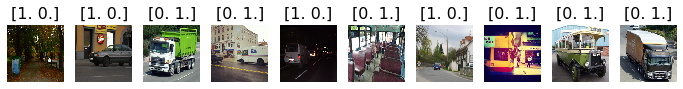

In [19]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles=test_labels)

In [20]:
test_labels = test_labels[:,0]
test_labels

array([1., 1., 0., 0., 1., 0., 1., 0., 0., 0.], dtype=float32)

In [23]:
predictions = model.predict_generator(generator=test_batches, steps=1, verbose=0)
predictions

array([[0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

## Confusion Matrix

In [0]:
cm = confusion_matrix(y_true=test_labels, y_pred=np.round(predictions[:,0]))

In [0]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[5 1]
 [2 2]]


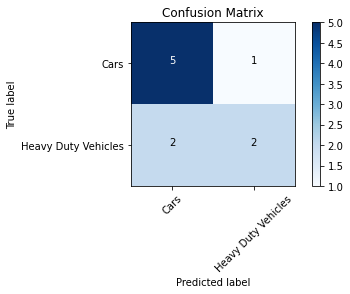

In [26]:
cm_plot_labels = ['Cars','Heavy Duty Vehicles']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

## Build fine tuned VGG16 model

In [27]:
vgg16_model = keras.applications.vgg16.VGG16()

553467904/553467096 [==============================] - 8s 0us/step


In [28]:
vgg16_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [29]:
type(vgg16_model)

keras.engine.training.Model

In [0]:
model = Sequential()
for layer in vgg16_model.layers[:-1]:
    model.add(layer)

In [31]:
type(model)

keras.engine.sequential.Sequential

In [32]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

In [0]:
for layer in model.layers:
    layer.trainable = False

In [0]:
model.add(Dense(2, activation='softmax'))

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
_________________________________________________________________
block3_conv1 (Conv2D)        (None, 56, 56, 256)      

## Train a fine tuned model

In [0]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [37]:
model.fit(x=train_batches, steps_per_epoch = 70, validation_data=valid_batches, validation_steps = 8, epochs=10, verbose=2)

Epoch 1/10
 - 400s - loss: 0.7570 - accuracy: 0.6657 - val_loss: 0.6249 - val_accuracy: 0.7750
Epoch 2/10
 - 399s - loss: 0.2444 - accuracy: 0.9071 - val_loss: 0.3449 - val_accuracy: 0.8375
Epoch 3/10
 - 397s - loss: 0.1547 - accuracy: 0.9457 - val_loss: 0.3952 - val_accuracy: 0.8500
Epoch 4/10
 - 399s - loss: 0.1132 - accuracy: 0.9586 - val_loss: 0.3369 - val_accuracy: 0.8625
Epoch 5/10
 - 398s - loss: 0.0887 - accuracy: 0.9700 - val_loss: 0.2519 - val_accuracy: 0.8625
Epoch 6/10
 - 397s - loss: 0.0702 - accuracy: 0.9786 - val_loss: 0.7440 - val_accuracy: 0.8625
Epoch 7/10
 - 400s - loss: 0.0591 - accuracy: 0.9814 - val_loss: 0.2444 - val_accuracy: 0.8625
Epoch 8/10
 - 399s - loss: 0.0477 - accuracy: 0.9857 - val_loss: 0.6752 - val_accuracy: 0.8625
Epoch 9/10
 - 397s - loss: 0.0413 - accuracy: 0.9914 - val_loss: 0.4961 - val_accuracy: 0.8500
Epoch 10/10
 - 399s - loss: 0.0348 - accuracy: 0.9986 - val_loss: 0.0537 - val_accuracy: 0.8625


## Predict using fine tuned VGG16 model

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


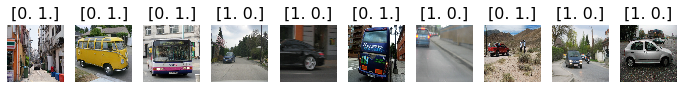

In [38]:
test_imgs, test_labels = next(test_batches)
plots(test_imgs, titles = test_labels)

In [39]:
test_labels = test_labels[:,0]
test_labels

array([0., 0., 0., 1., 1., 0., 1., 0., 1., 1.], dtype=float32)

In [0]:
predictions = model.predict_generator(test_batches, steps=8, verbose=0)
#predictions = model.predict(x=test_batches, verbose=0)

Confusion matrix, without normalization
[[12 18]
 [16 34]]


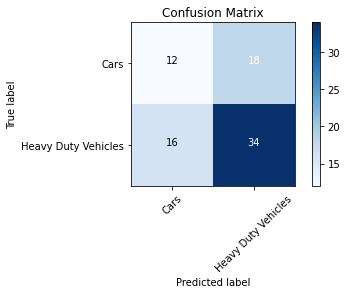

In [41]:
cm = confusion_matrix(y_true=test_batches.classes, y_pred=np.argmax(predictions, axis=-1))
cm_plot_labels = ['Cars','Heavy Duty Vehicles']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')